# **TASK 4**

# **MACHINE LEARNING**
#### Student: SAMUEL_BAIDOO
#### Student ID: 230060999
#### Programme: MSC APPLIED ARTIFICIAL INTELLIGENCE

# **INTRODUCTION**
This report summarizes and evaluates an applied machine learning (ML) activity on a practical data from the banking industry. The ML procedures employed a supervised learning techniques involving exploratory data analysis (EDA) which is thought as “..an attitude or philosophy about how data analysis should be carried out..(Yu, 2022)”, data pre-processing (DPP), feature engineering, feature selection, modelling, and predictions. The project’s dataset is a collection of data from May 2008 to November 2010 regarding a marketing campaign conducted by a Portuguese retail bank - Banco de Portugal (UCI, 2024). The project is aimed at helping the bank’s management to make the best decision using ML which is part of decision support systems (DSSs) (Moro et al., 2014). The report discusses the motivation for decisions and the insights and relevant discoveries are also discussed.


In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np

import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 21)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
import cProfile
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# __EDA AND DATA PRE-PROCESSING__
EDA was performed to understand the various data shapes, types, visualize data, correlations, statistics, missing values, outliers, imbalances and etc within the dataset. The DPP stage provided solution to treating anomalies like missing values, outliers, imbalances and encoding of categorical values. Dealing with imbalance within the minority and majority class of the target variable was a significant challenge. Several attempts were made including the use of Synthetic Minority Oversampling Technique (SMOTE) and trying four different models, but the issues were not resolved. However, the “Upsampling method”’ of duplicating the samples within the minority class to match the majority class proved useful (He and Garcia, 2009).


In [2]:
# Loading the dataset.head(10)
bank_data = pd.read_csv('bank-full.csv')
display(bank_data.head(5))
display('There are {} observations with {} features'.format(bank_data.shape[0], bank_data.shape[1]))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


'There are 41188 observations with 21 features'

In [3]:
# Check unique values for categorical columns
for col in bank_data.select_dtypes(include='object').columns:
    print(col)
    print(bank_data[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


# Insights
- The job column has the highest values of 12 followed by education with 8. They will require encoding later on.

In [4]:
# Check data types in the bank_data
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

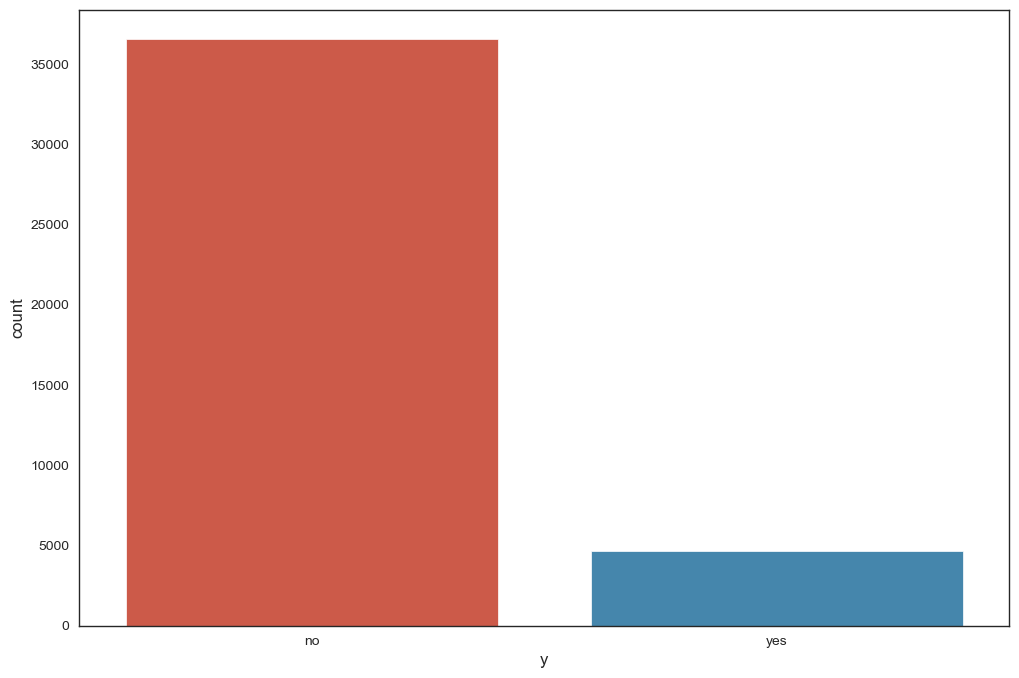

y
no     36548
yes     4640
Name: y, dtype: int64

In [5]:
# Visualizing imbalance in the target variable
sns.countplot(x='y',data=bank_data)
plt.show()
bank_data['y'].groupby(bank_data['y']).count()

# Insights
- The data is highly imbalanced with only 11.27% yes and 88.73% no. Therefore, a classifier (Upsample Minority Class) that produces a balanced measure of predictive accuracy for both minority and majority classes was employed (He and Garcia, 2009).


In [7]:
#Checking numeric data types
numeric_data = bank_data.select_dtypes(include = np.number)
numeric_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191


In [8]:
#Checking for numeric columns
numeric_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [9]:
#Checking for categorical data
categorical_data = bank_data.select_dtypes(exclude = np.number)
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [10]:
#Categorical columns
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

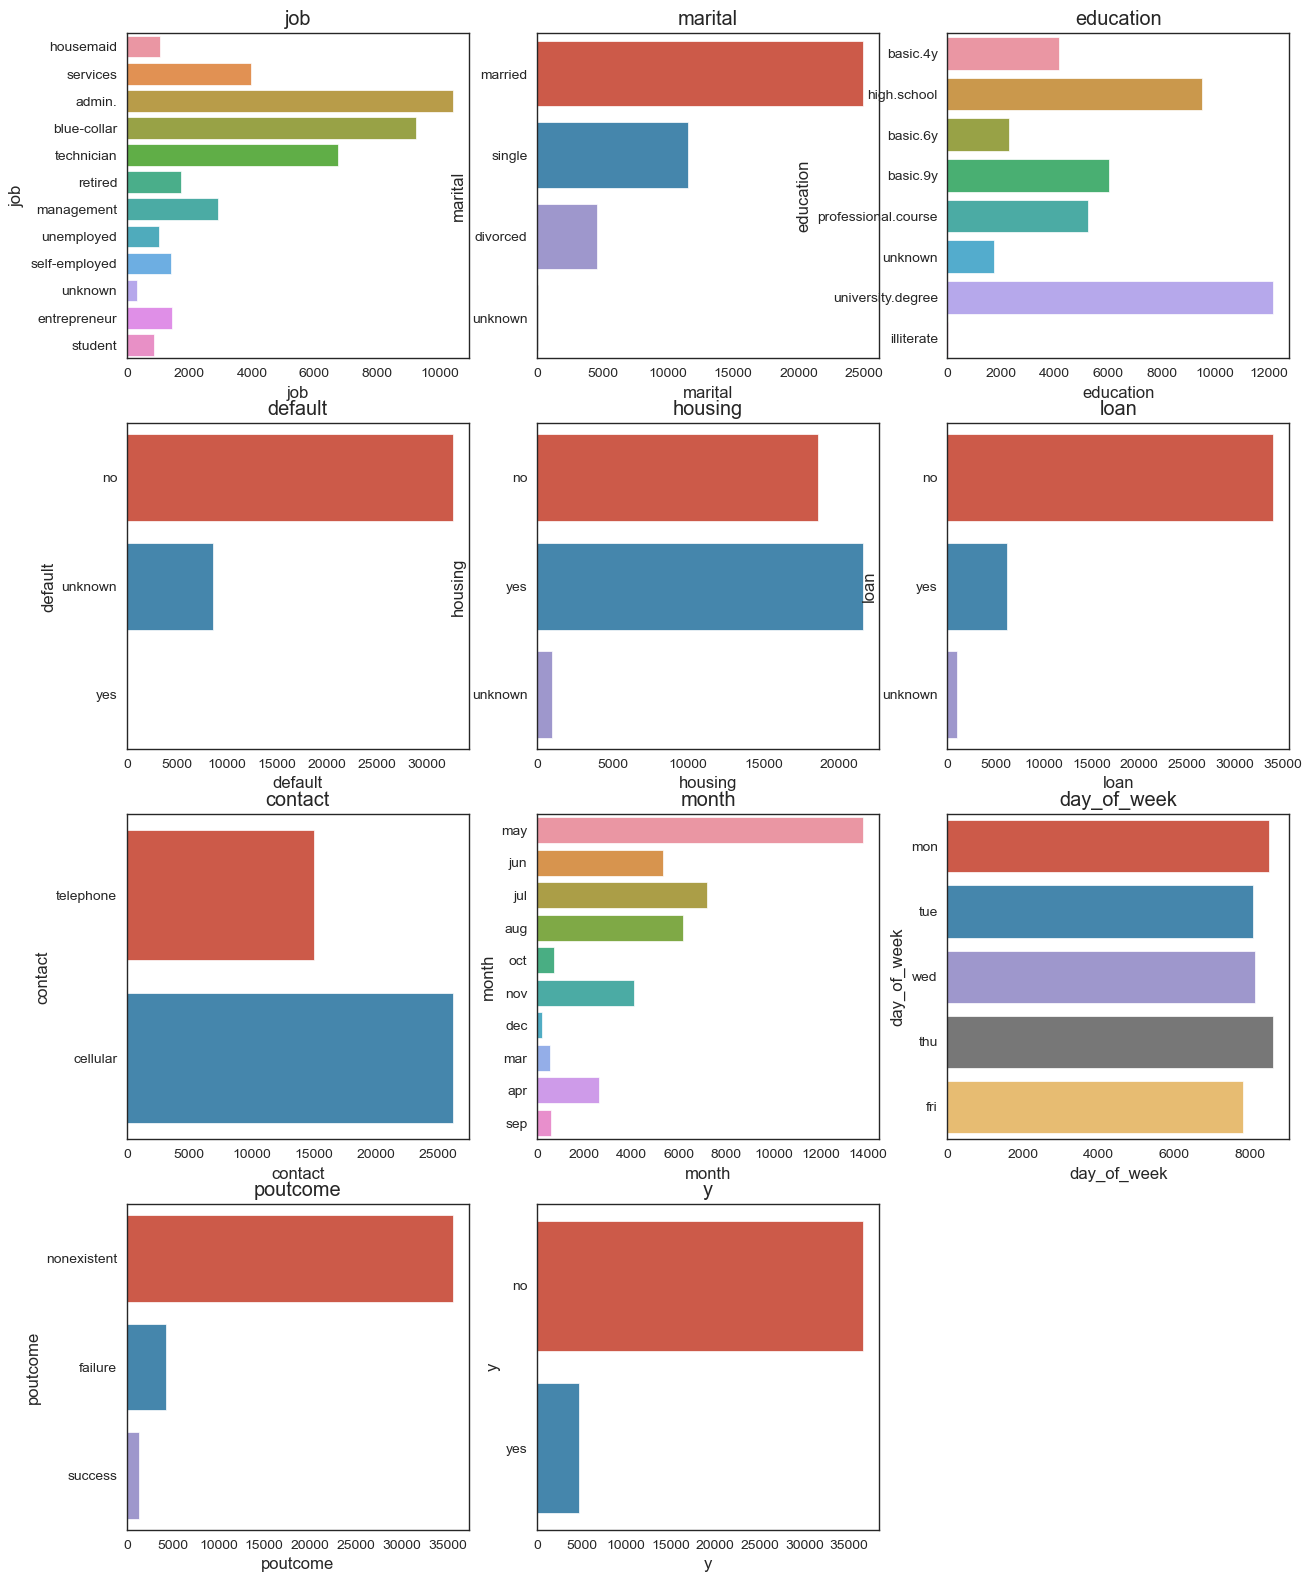

In [11]:
# Visualize count of occurences of categorical features
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for categorical_feature in categorical_data:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=bank_data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# Insights
- The majority of job holders are within admin workers. Significant proportion of the clients are married and while many of hold university degree.The months of May is a crucial month whereas Monday and Thursday are significant days in the business week.

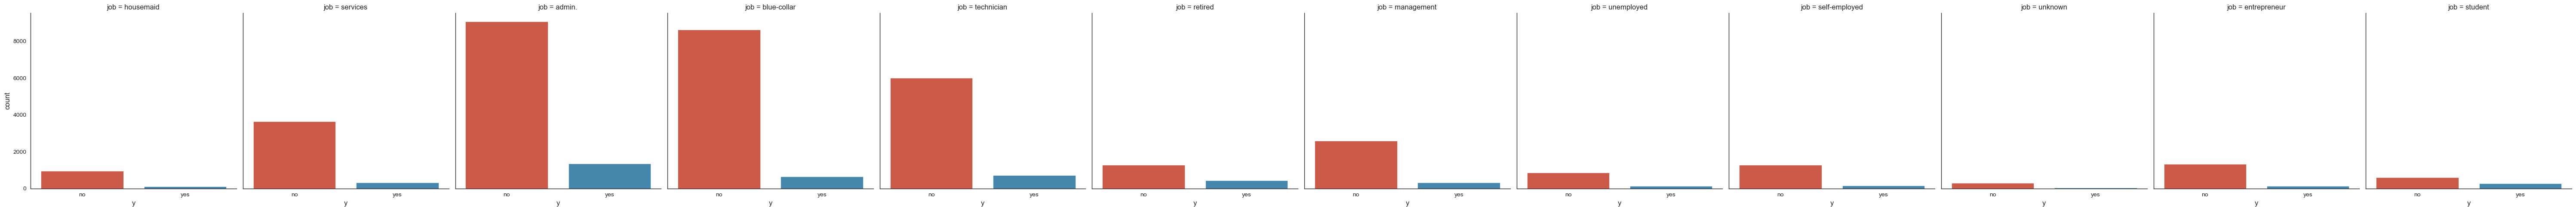

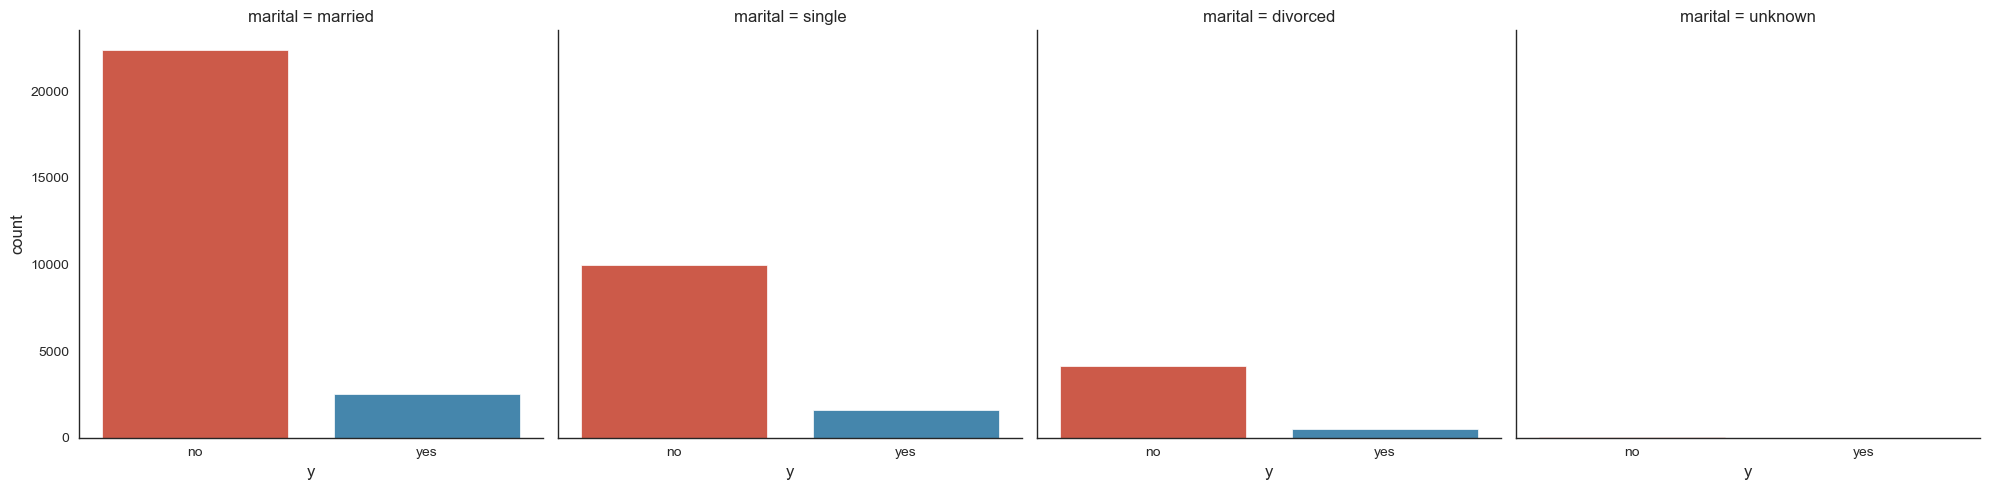

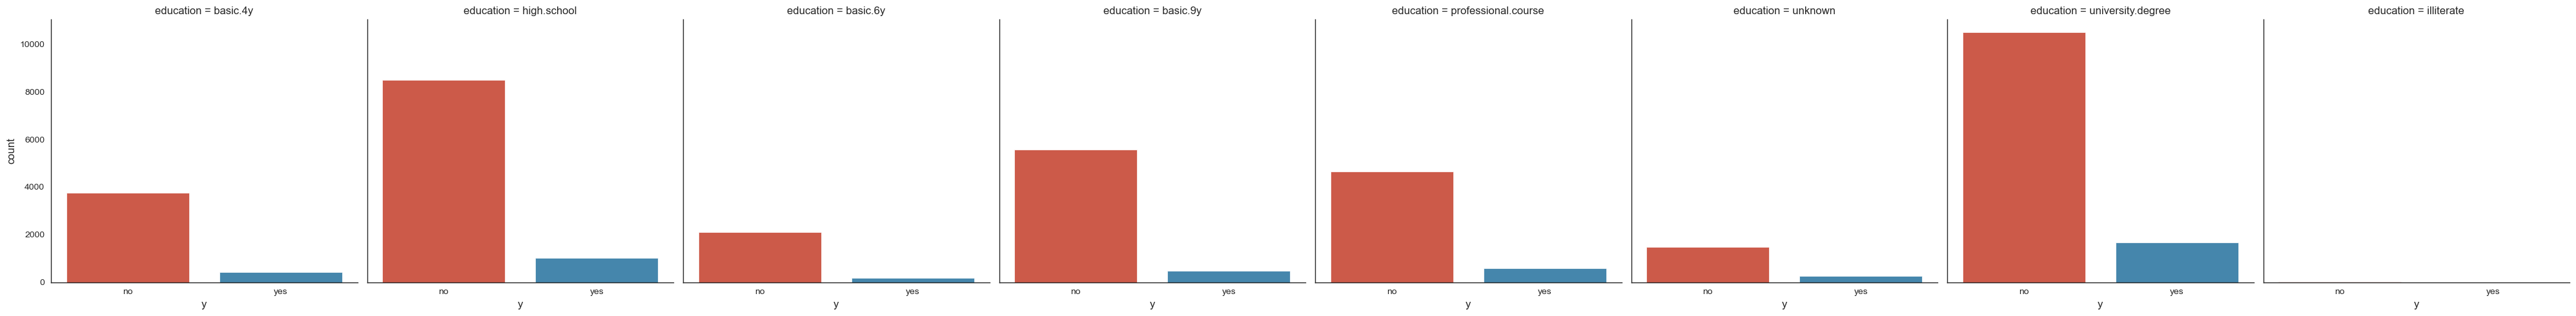

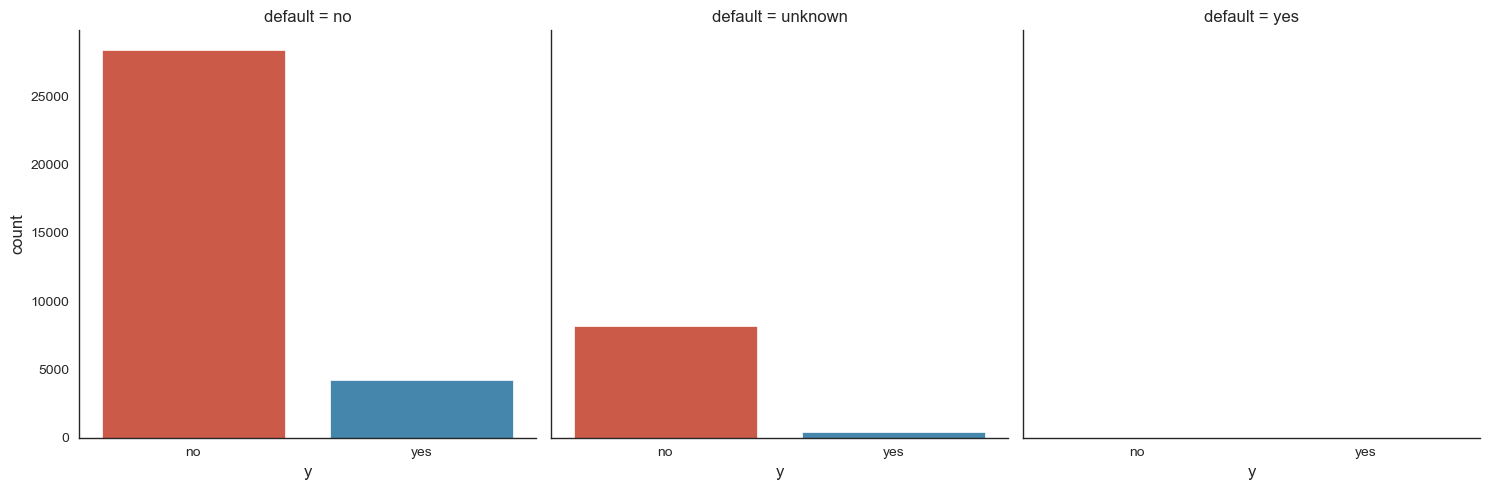

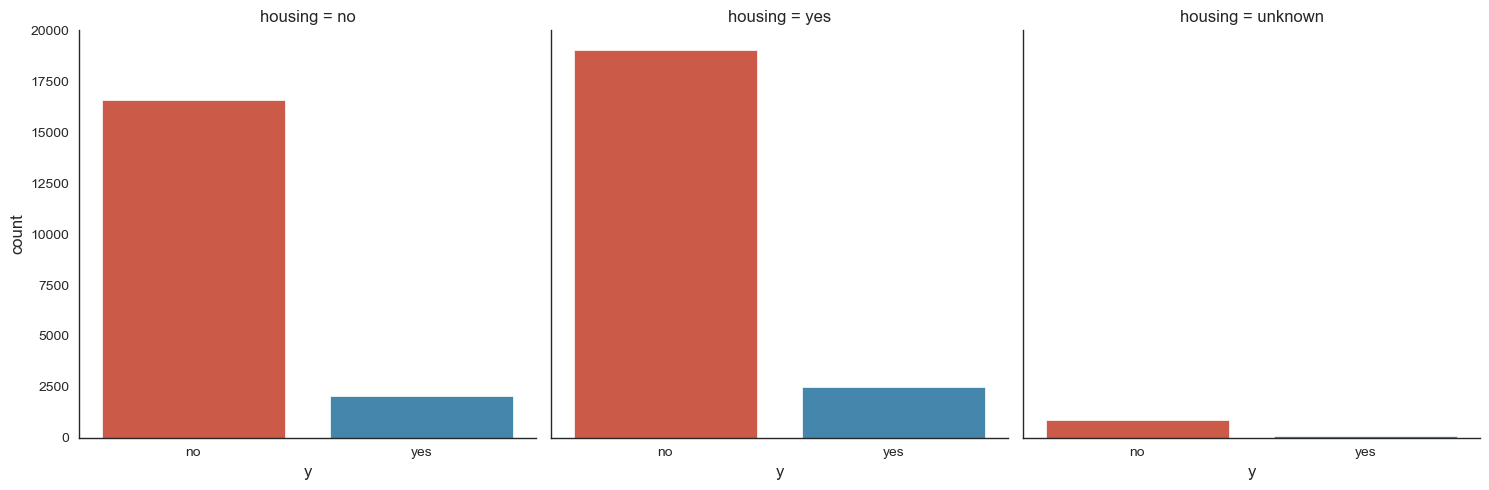

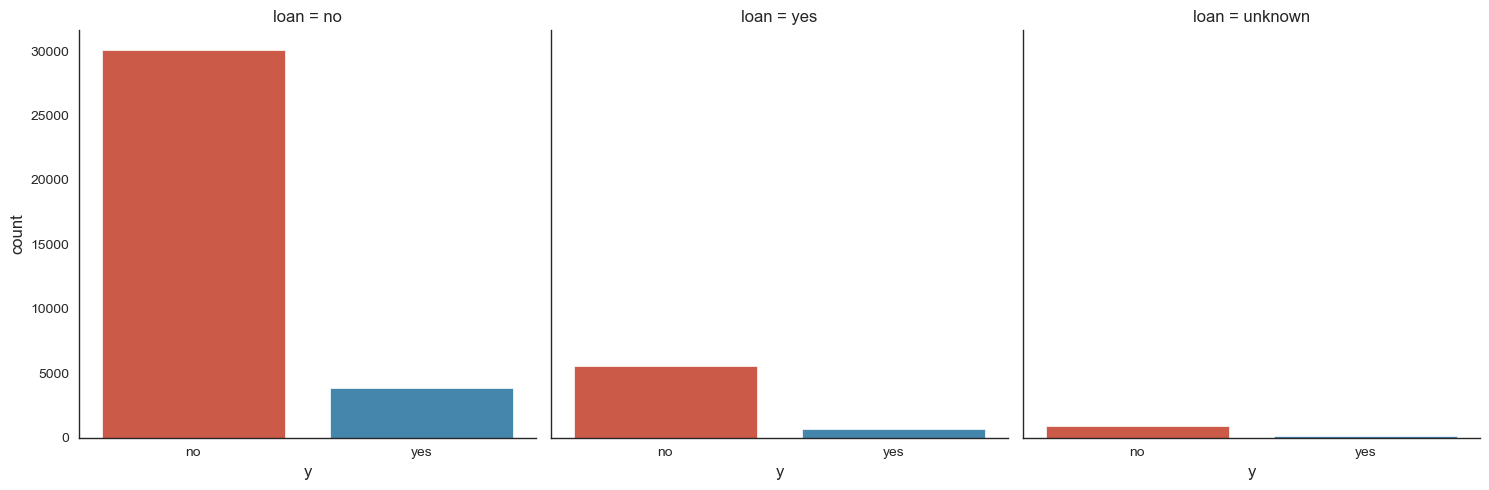

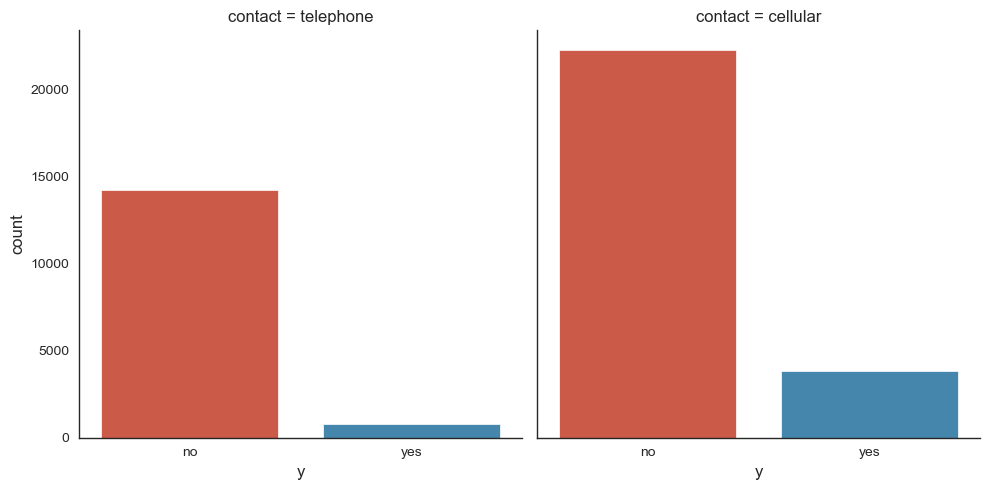

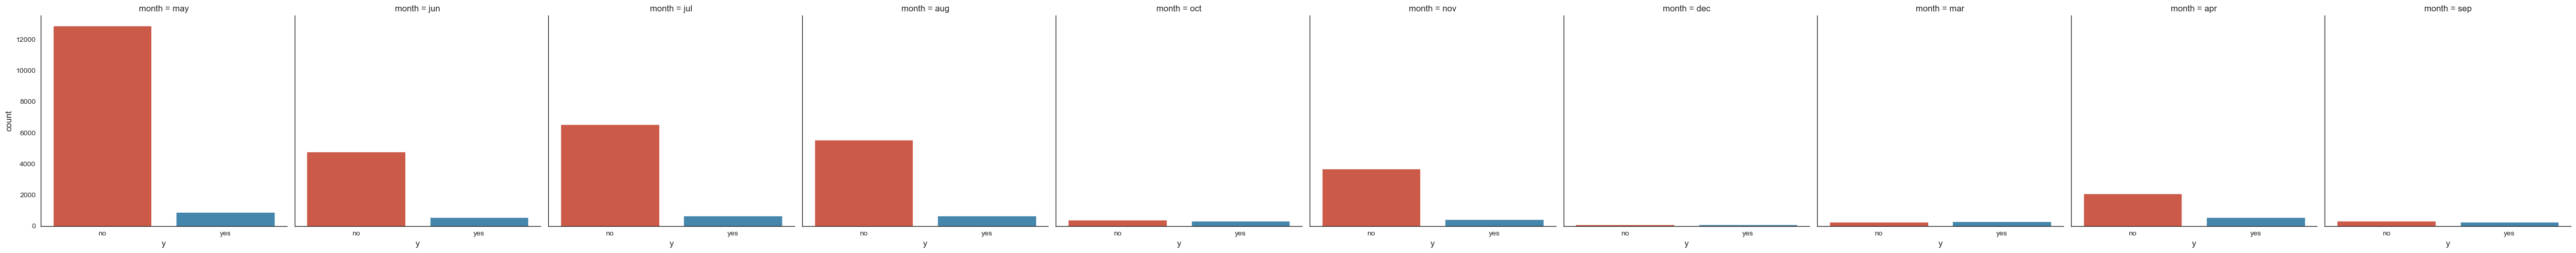

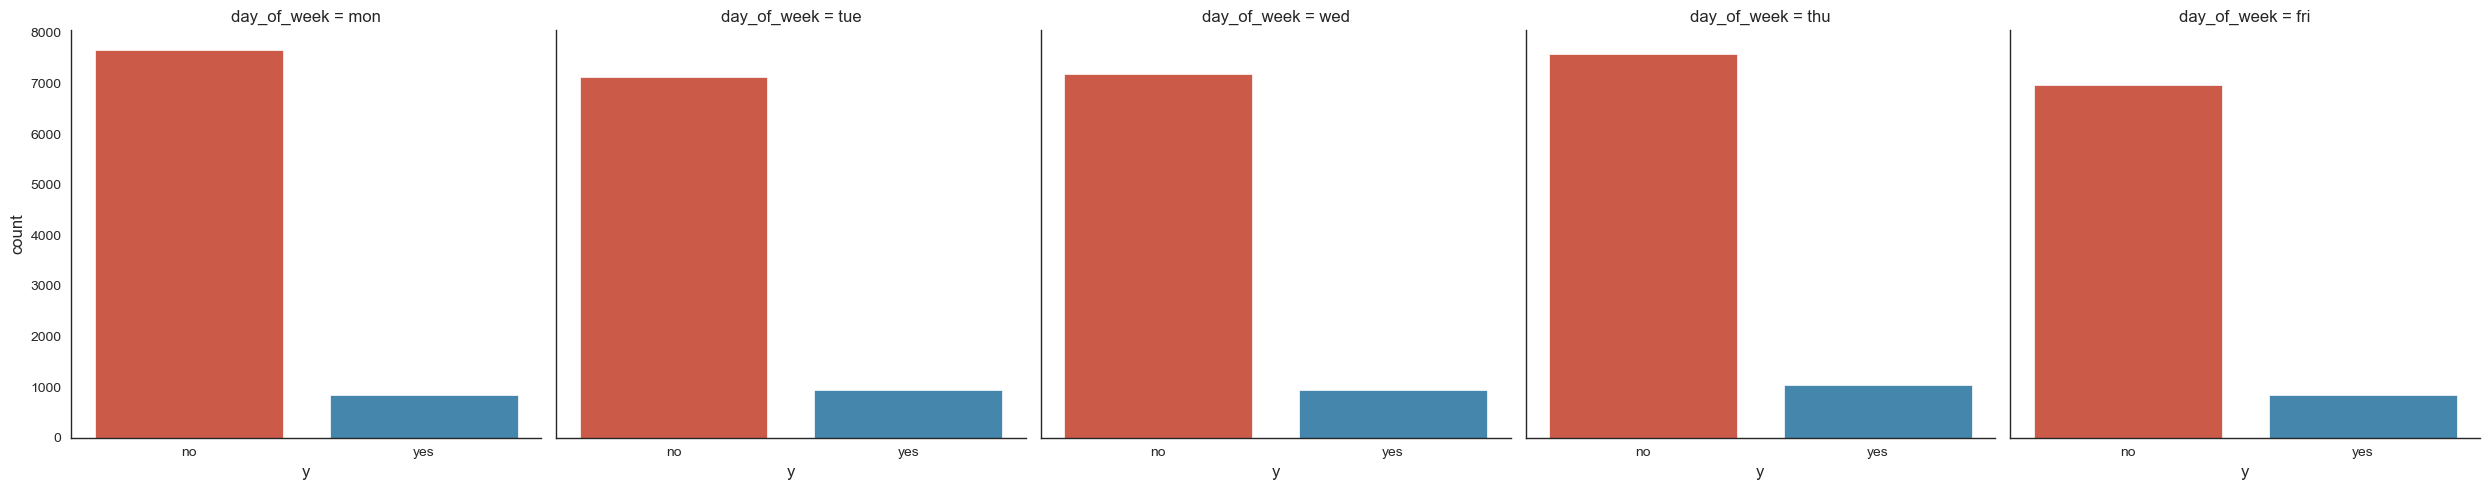

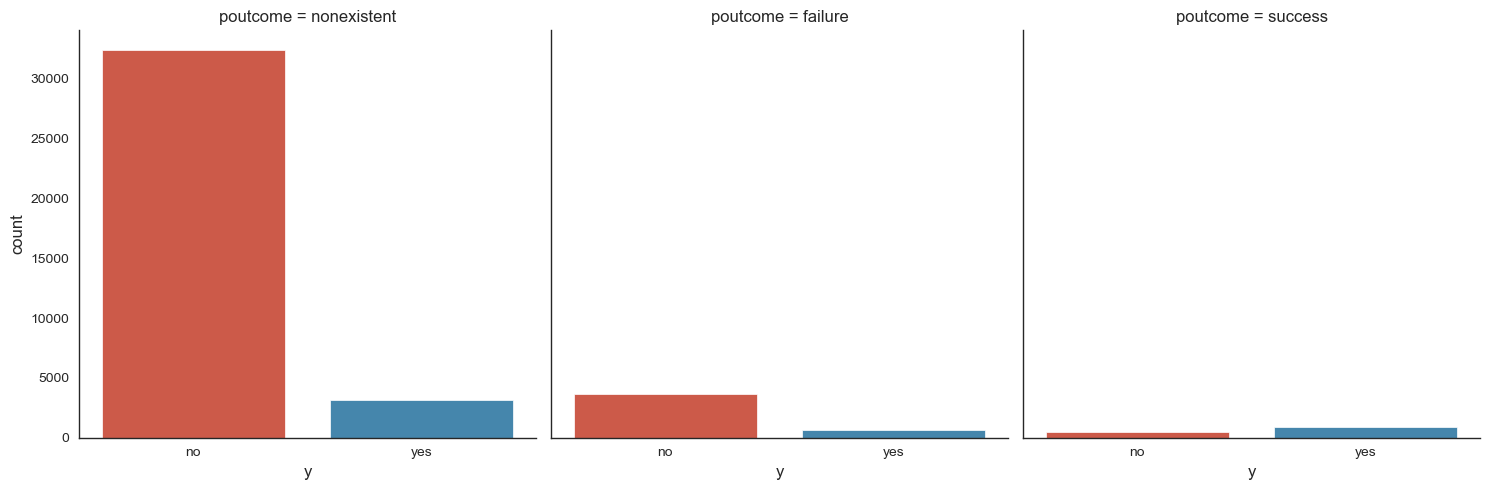

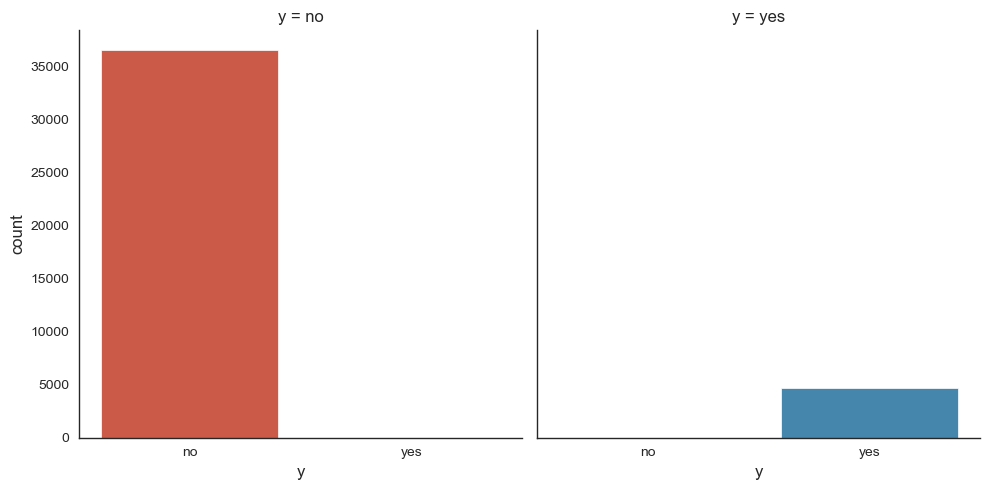

In [12]:
# Visualize count of target variable 'y' by categorical features
for categorical_feature in categorical_data:
    sns.catplot(x='y', col=categorical_feature, kind='count', data=bank_data)
plt.show()

# Insights
- Only the outcome of the previous marketing campaign **(poutcome)** has more 'yes' than 'no' in the entire dataset.
- This suggest that many of the exsiting clients might have subscribed to the bank's product as a result of the previous campaign

In [13]:
#Checking out the statistical parameters
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [14]:
#Checking the categories and their respective counts in each feature
print("Job:",bank_data.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank_data.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank_data.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank_data.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank_data.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank_data.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank_data.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank_data.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",bank_data.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank_data.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank_data.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

# Insights:

We got unknown category in each feature, we should figure out how to deal with that
This campaign only operated during weekdays
I can't understand what is non-existent category in previous outcome aka poutcome, if you have figured out what is it let me know in the comments.

# Pre-processing 

<Axes: >

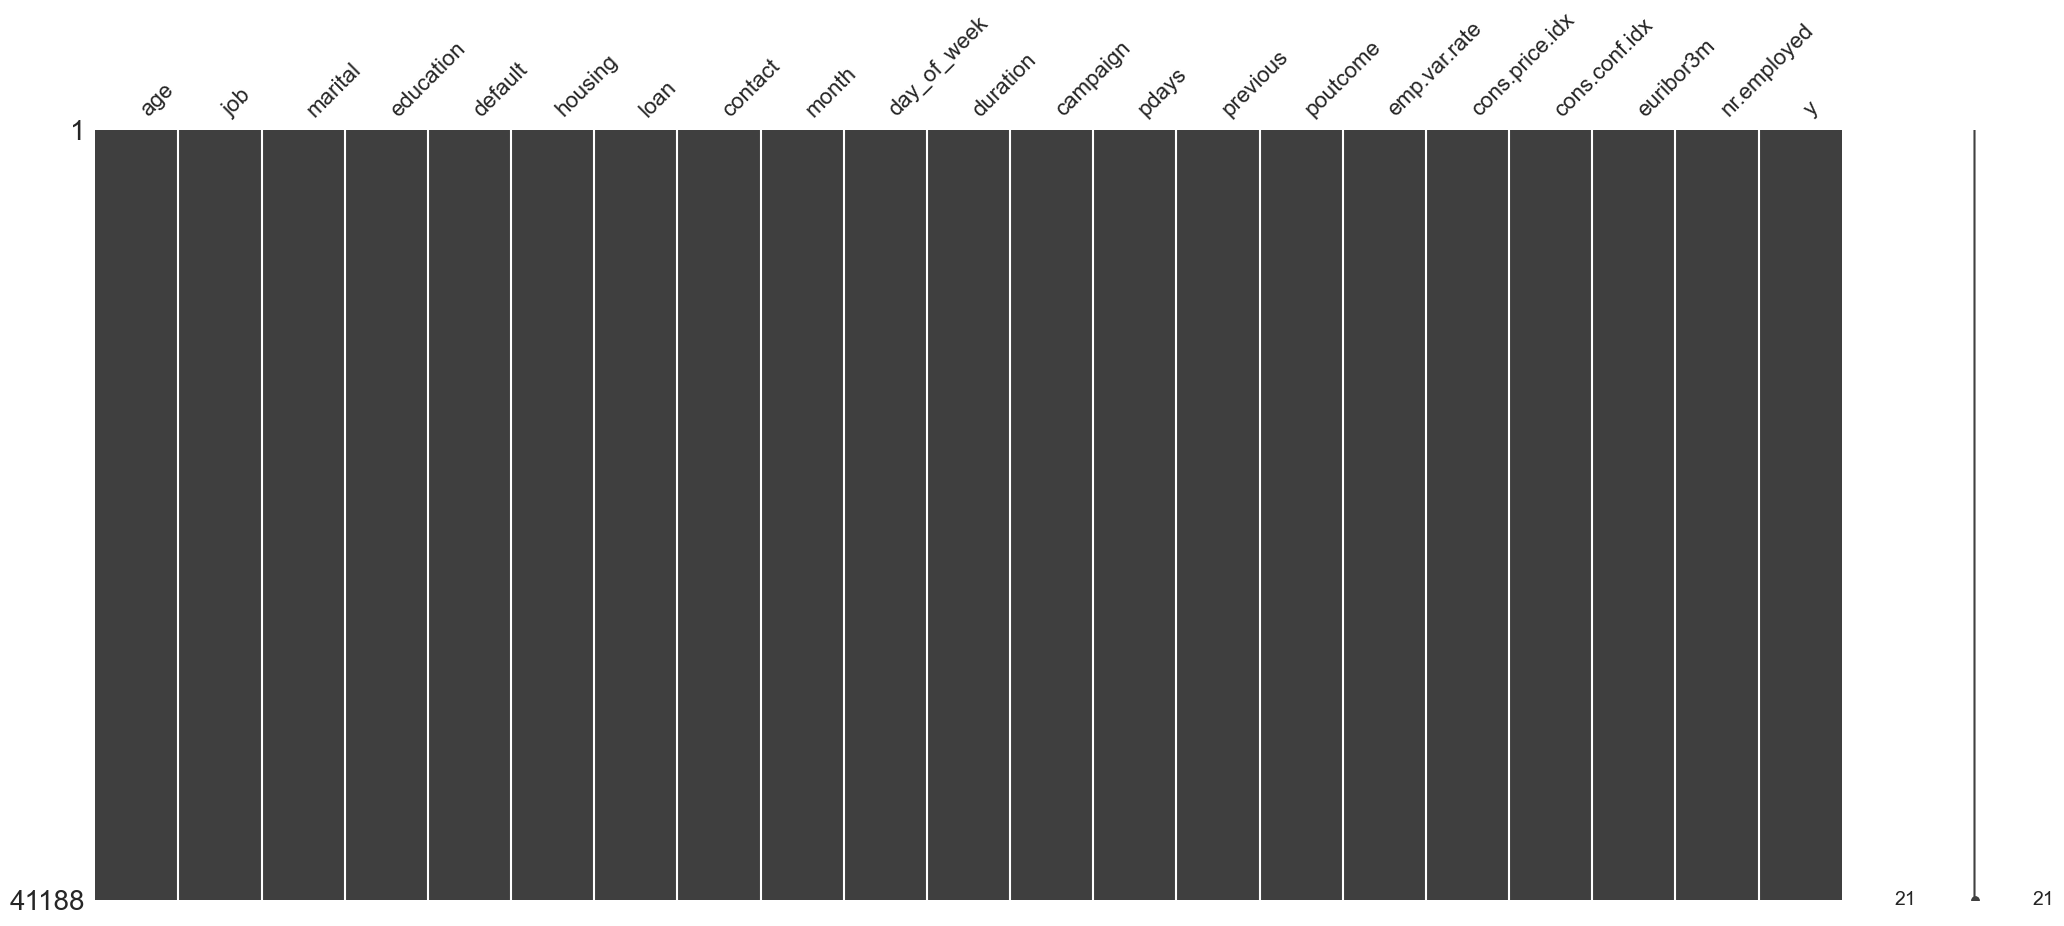

In [15]:
import missingno as msno 
msno.matrix(bank_data)

In [16]:
#Double checking for missing values
print('Data columns with null values:',bank_data.isnull().sum(), sep = '\n')

Data columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


<BarContainer object of 41188 artists>

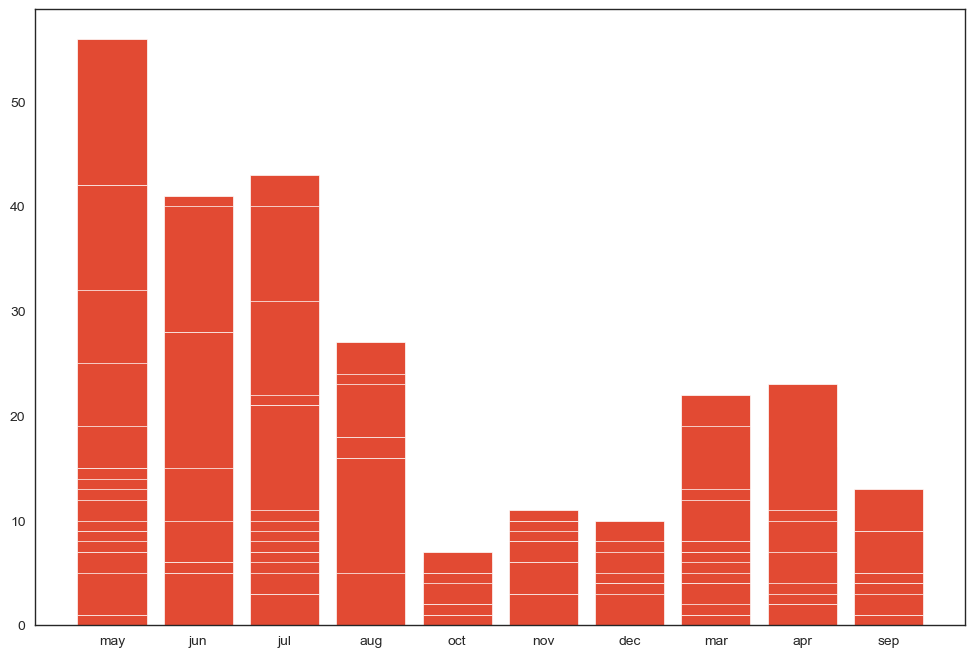

In [17]:
#Check relationship between month and campaign
plt.bar(bank_data['month'], bank_data['campaign'])

# Insights:

We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July)


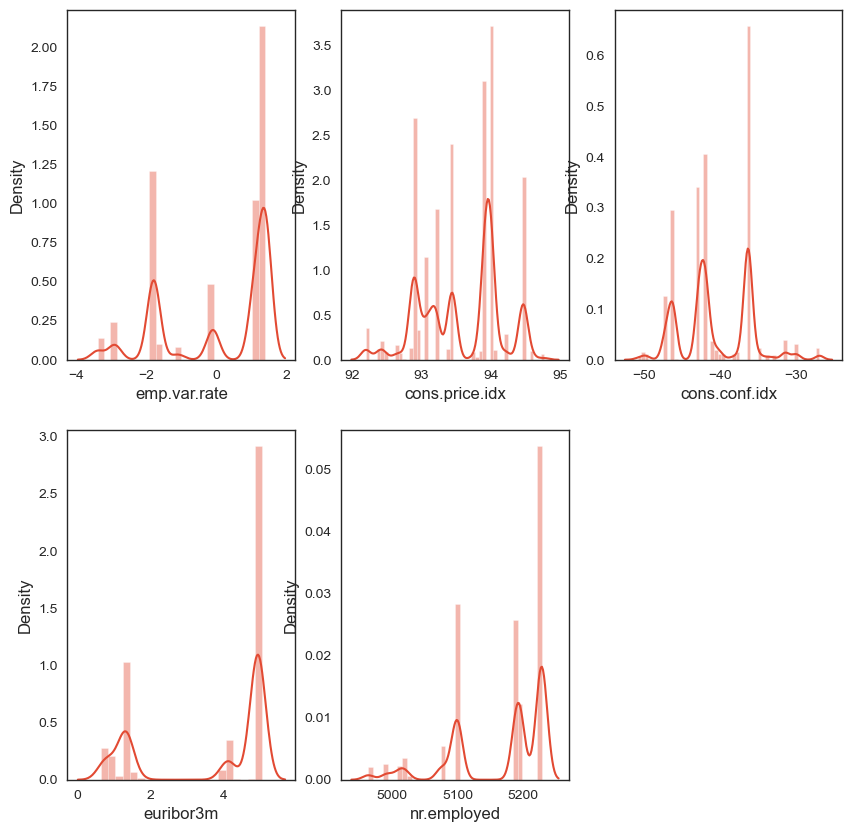

In [18]:
# Subplot 1: Distribution plots
plt.subplot(231)
sns.distplot(bank_data['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(bank_data['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(bank_data['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(234)
sns.distplot(bank_data['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(bank_data['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

# Insights:

We can see there is a high employee variation rate which signifies that they have made the campaign when there were high shifts in job due to conditions of economy
The Consumer price index is also good which shows the leads where having good price to pay for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings
Consumer confidence index is pretty low as they don't have much confidence on the fluctuating economy
The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In our case the interest rates are high for lending their loans
The number of employees were also at peak which can increase their income index that could be the reason the campaign targetted the leads who were employeed to make a deposit

<Axes: xlabel='cons.price.idx', ylabel='marital'>

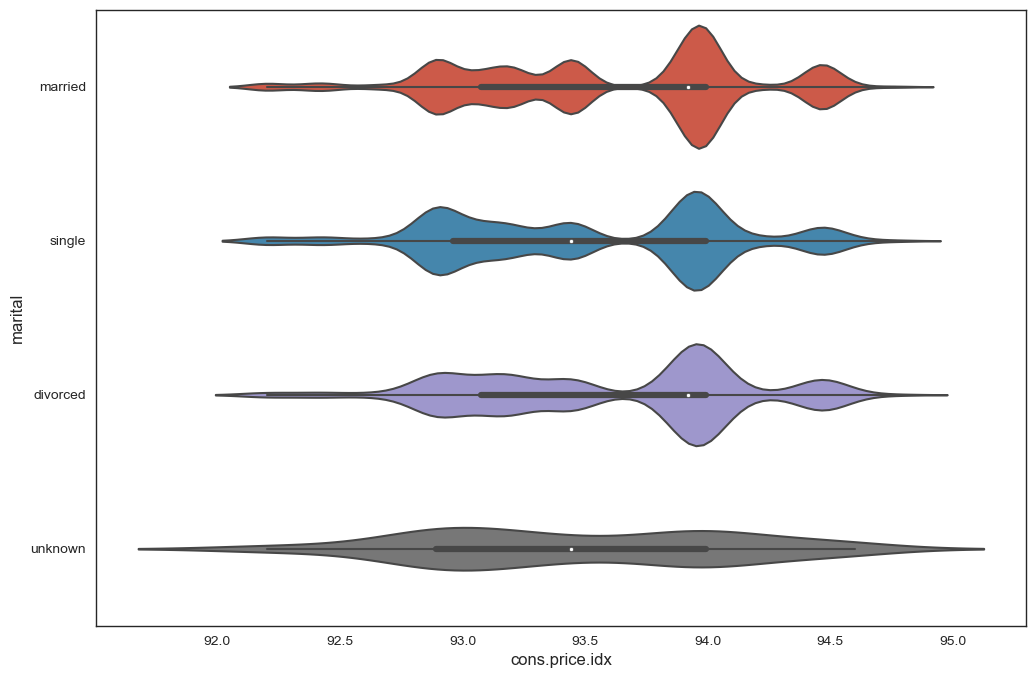

In [19]:
# Violin plot showing the distribution of 'cons.price.idx' for each category of 'marital' variable
sns.violinplot( y=bank_data["marital"], x=bank_data["cons.price.idx"] )

# Insights:

There are very minute differences among the price index
Married leads have considerably have an upper hand as they have index contributing as couple

<Axes: xlabel='education'>

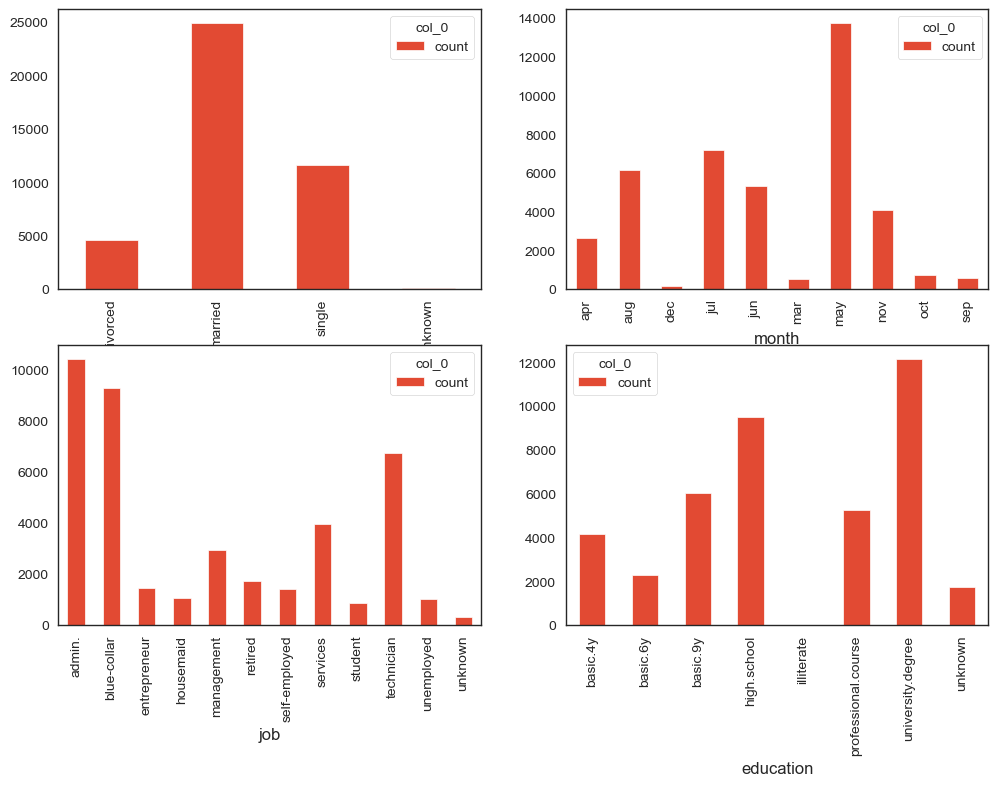

In [20]:
# Filtering the data to include only rows where the target variable 'y' is 'yes'
bank_yes = bank_data[bank_data['y']=='yes']

# Creating frequency tables using crosstab for different categorical variables
df1 = pd.crosstab(index=bank_data["marital"], columns="count")
df2 = pd.crosstab(index=bank_data["month"], columns="count")
df3 = pd.crosstab(index=bank_data["job"], columns="count")
df4 = pd.crosstab(index=bank_data["education"], columns="count")

# Creating subplots 
fig, axes = plt.subplots(nrows=2, ncols=2)

# Plotting bar charts for each frequency table on separate subplots
df1.plot.bar(ax=axes[0, 0])
df2.plot.bar(ax=axes[0, 1])
df3.plot.bar(ax=axes[1, 0])
df4.plot.bar(ax=axes[1, 1])

# Insights:

- Married leads have made high subscription followed by single
- Many people subscribed to the bank's products and services during month of May
- Leads who work in administrative position had high subcription followed by technicians and blue collar employees
- Leads who had at least university degree had made the highest subcription followed by highschool

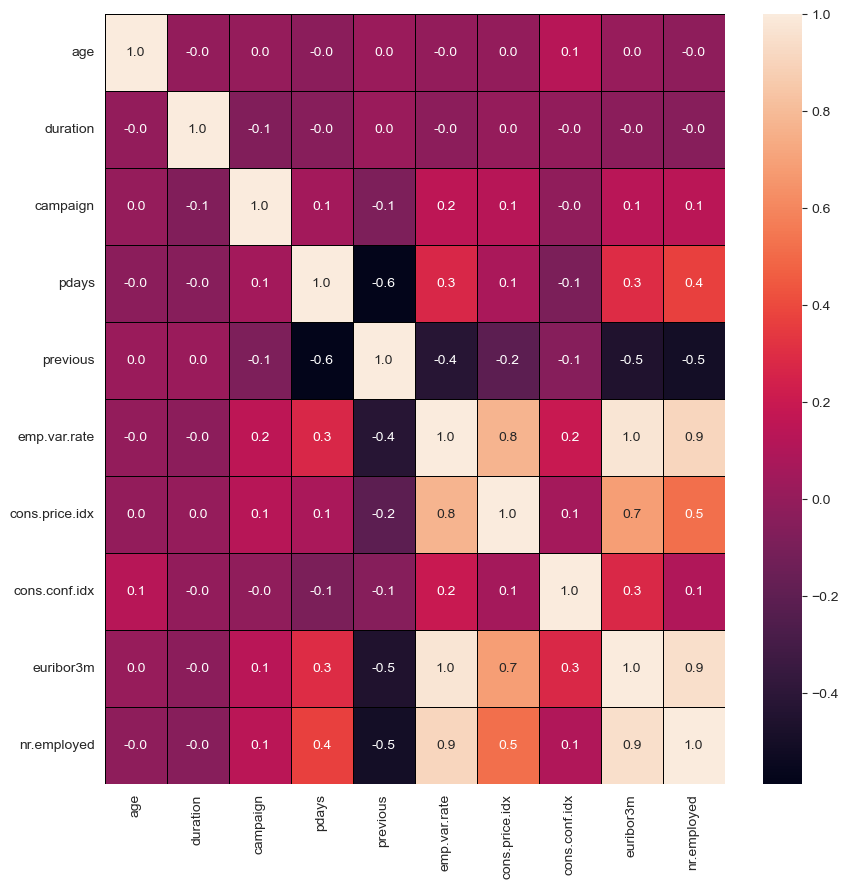

In [21]:
# Generating a heatmap of the correlation matrix for the bank_data DataFrame
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank_data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

# Insights:

- Number of employees rate is highly correlated with employee variation rate
- Consumer price index is highly correlated with bank interest rate ( higher the price index, higher the interest rate)
- Employee variation rate also correlates with the bank interest rates

# Handling outliers

Text(0.5, 1.0, 'No of employees')

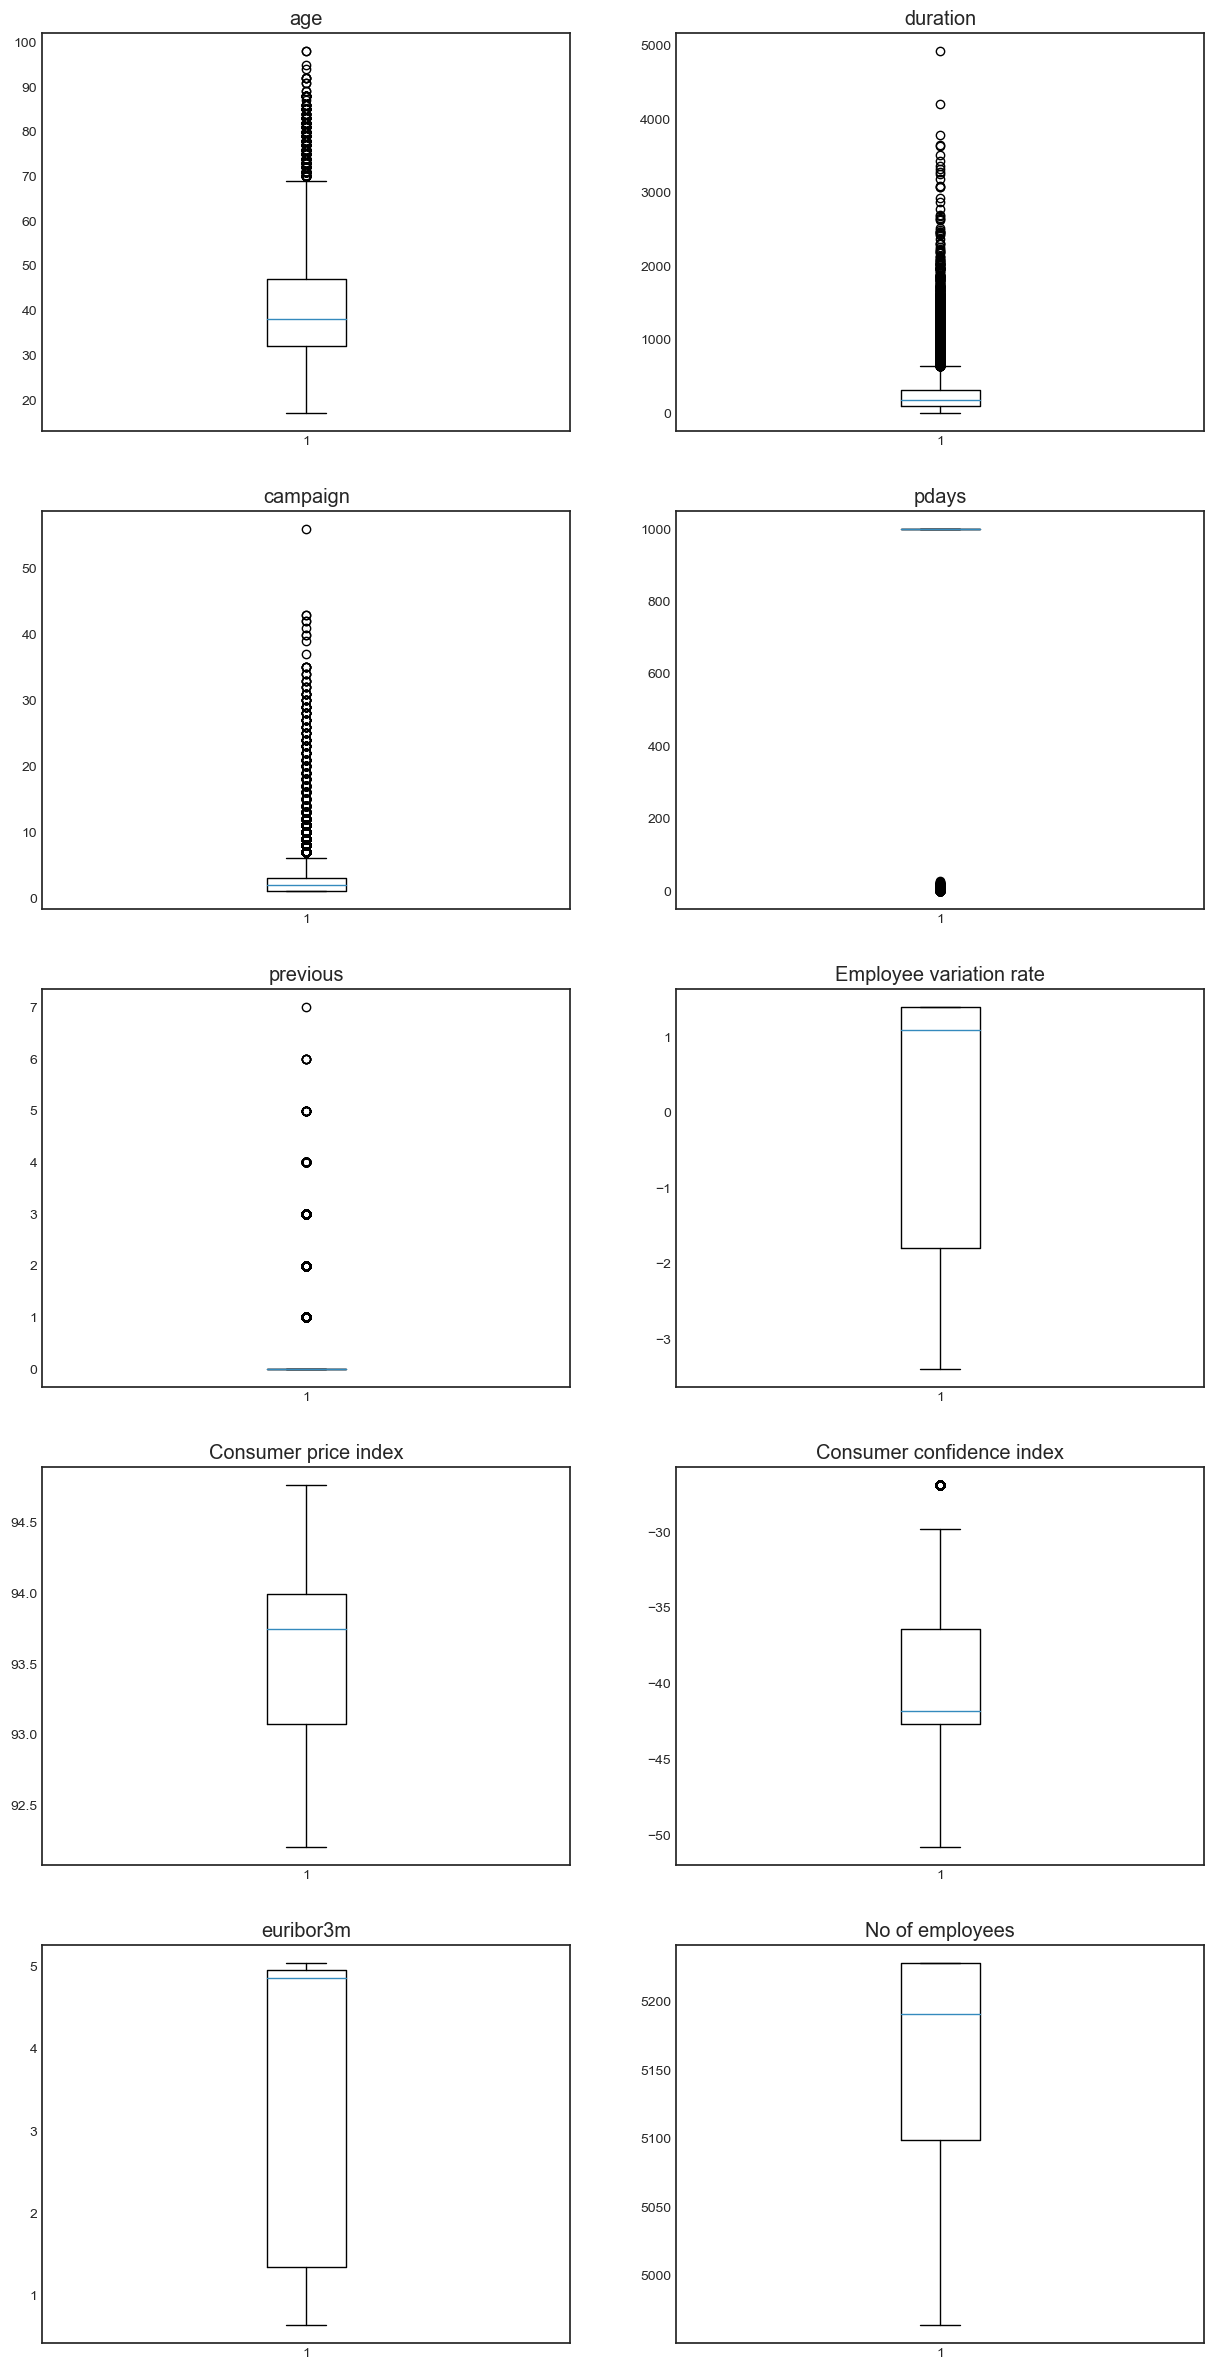

In [22]:
# Create subplots to view outliers
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank_data['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_data['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank_data['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank_data['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank_data['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank_data['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank_data['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank_data['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank_data['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank_data['nr.employed'])
ax.set_title('No of employees')

# Insights
- Many features do not have much outliers except for age,duration and campaign. Only the affected features will be treated using IQR method.

In [23]:
#Treating outliers
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_data[cols].quantile(0.25)
    Q3 = bank_data[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_data[cols] >= Q1 - 1.5 * IQR) & (bank_data[cols] <= Q3 + 1.5 *IQR)
    bank_data=bank_data.loc[filter]

Text(0.5, 1.0, 'campaign')

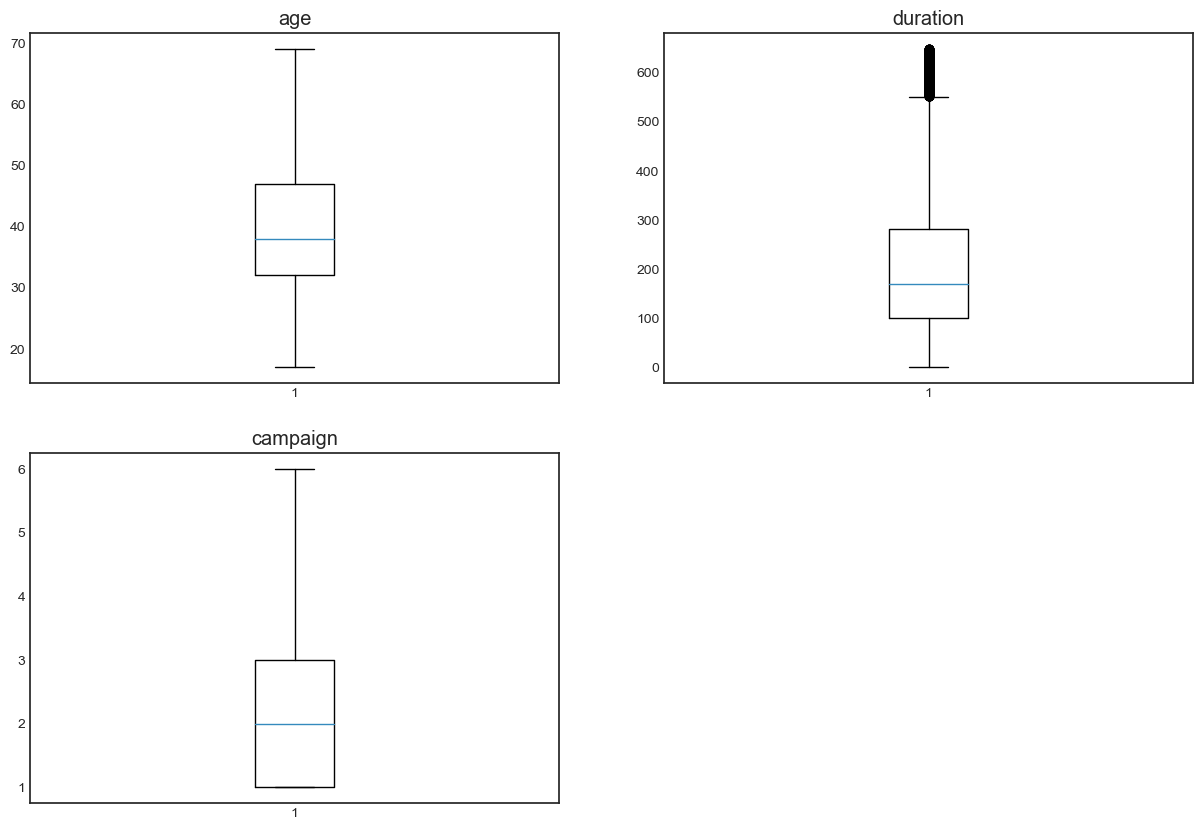

In [24]:
#Display after treating outliers
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank_data['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_data['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_data['campaign'])
ax.set_title('campaign')

In [25]:
# Joining and categorising values in the Education column
bank_features=bank_data.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

middle.school          10688
university.degree      10559
high.school             8287
professional.course     4554
unknown                 1459
illiterate                14
Name: education, dtype: int64

In [26]:
# Conversion of non-numeric values for month and day_of_week to numeric
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict)

In [27]:
#Displaying features after conversion
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [28]:
# Encoding 999 in pdays as 0
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0
bank_features['pdays'].value_counts()

0     34305
3       367
6       343
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: pdays, dtype: int64

In [29]:
#Conversion of yes, no and unknown in housing, default and loan
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

In [30]:
#Conversion of yes and no in y
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

In [31]:
#Displaying after conversion
bank_features.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


In [32]:
#One hot encoding of contact and poutcome
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [33]:
#Displaying after encoding
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [34]:
#Frequency encoding
#Using frequency encoding with job and education features in the dataset
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [35]:
#Using frequency encoding with job and education features in the dataset
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [36]:
#Display after encoding
bank_features.loc[:,['job','education']].head()

,job,education
0,899,10688
1,3456,8287
2,3456,8287
3,9110,10688
4,3456,8287


In [37]:
#Target Guided Ordinal Encoding
bank_features.groupby(['marital'])['y'].mean()

marital
divorced    0.063988
married     0.069050
single      0.113226
unknown     0.129032
Name: y, dtype: float64

In [38]:
#Encode marital feature based on the target 'y' 
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [39]:
#Converting categorical values of marital to numeric
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [40]:
#change marital to marital ordinal
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [41]:
#Display value counts
bank_features.marital_ordinal.value_counts()

1    21506
2    10086
0     3907
3       62
Name: marital_ordinal, dtype: int64

In [42]:
#Dropping duration to ensure a better predictive model
bank_features.drop(['duration'], axis=1,inplace=True)

# Important note: 
- **Duration** highly affects the output target (e.g., if duration=0 then y='no'). 
- Duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
- Thus, duration is ONLY useful for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- Therefore, duration has been dropped.

In [43]:
# Standardizing numerical variables
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [44]:
#Scaling all features
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,899,10688,0,0,0,5,2,0,1,1,0,1,1.694643,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340567
1,3456,8287,-1,0,0,5,2,0,1,1,0,1,1.797965,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340567
2,3456,8287,0,1,0,5,2,0,1,1,0,1,-0.268482,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340567
3,9110,10688,0,0,0,5,2,0,1,1,0,1,0.041485,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340567
4,3456,8287,0,0,1,5,2,0,1,1,0,1,1.694643,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340567


From the bar plot we can see the importances of features based on it's impact towards output. Let's take up the top 15 features

# Train and Test Split (80:20)
- Treating imbalance in the target variable with Upsampling method
- Split the data into train and test
- The training (80%) set is used to train the model, and the testing (20%) set is used to evaluate its performance.

In [45]:

# Separate majority and minority classes
majority_class = scaled_data[scaled_data['y'] == 0]
minority_class = scaled_data[scaled_data['y'] == 1]

# Upsample minority class
minority_upsampled = resample(minority_class, 
                               replace=True,     # sample with replacement
                               n_samples=len(majority_class),    # to match majority class
                               random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority_class, minority_upsampled])

# Display new class counts
print(df_upsampled['y'].value_counts())

# Separate features and target variable
X = df_upsampled.drop([ 'y'], axis=1)
y = df_upsampled['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# Print the shapes of training and testing data
print("Input Training:", X_train.shape)
print("Input Test:", X_test.shape)
print("Output Training:", y_train.shape)
print("Output Test:", y_test.shape)


0    32676
1    32676
Name: y, dtype: int64
Input Training: (52281, 20)
Input Test: (13071, 20)
Output Training: (52281,)
Output Test: (13071,)


# __FEATURE SELECTION__
In the feature selection, the goal was to streamline the dataset by selecting the most important features while minimizing information loss. Extra Trees Classifier (ETC), an ensemble learning technique suitable for handling large number of input variables while identifying most relevant variables was used. ETC was used to derive the most important features in the dataset. ETC was used because it is less prone to overfitting, easy to use and efficient. 
The ETC selected 17 most important features out of the 20. The most important feature was “Eurobor3m” (Euro Interbank Offered Rate for a three-month period) and the least being “default”. Eurobor3m is the interest rate at which European banks offer unsecured loans to other banks in the eurozone. Eurobor3m is widely used as a reference rate for various financial instruments, including mortgages, loans, and derivatives. In the context of financial datasets, eurobor3m often serves as a key economic indicator and can be an important feature in predictive modeling tasks related to finance and economics.


In [64]:
# Feature Selection
# Check the feature importances and of the features 

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

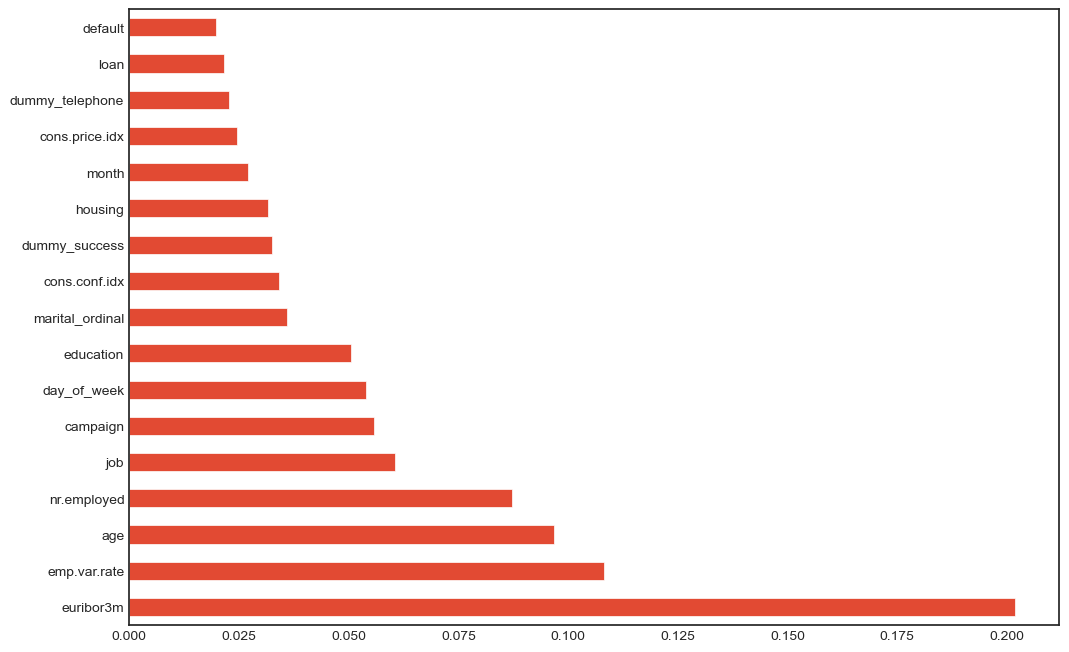

In [65]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

# Insights
- The ETC selected the above 17 features as the most important out of the 20 features. The most important feature was Euribor 3 Month Rate __“eurobor3m”__ and least being __“default”__ payment/non-payment on previous loan . 

# **MODELLING AND ASSESSMENT**

During the modeling phase, a comparative evaluation was conducted on five distinct classifiers as studies have shown that it is more beneficial to test the performance of many techniques on a problem before choosing the best (Delen et al., 2007).  The five models used were Logistic Regression Classifier (LRC), Decision Tree Classifier (DTC), K-Nearest Neighbors Classifier (KNN), Multi-Layer Perceptron (MLP) Classifier, and Bernoulli Naïve Bayes (BNB) Classifier, utilizing 10-fold cross-validation to assess their respective performance. 

LRC is a linear model used for binary classification tasks. It estimates the probability that a given input belongs to a certain class. DTC is a non-linear model used for both classification and regression tasks. It partitions the feature space into regions and predicts the target variable based on the majority class or average value of samples in each region. KNN is a non-parametric method used for classification and regression tasks. It predicts the target variable by finding the majority class or average value of the k-nearest neighbors in feature space. MLP is a type of neural network, sophisticated and inspired by biology used for classification and regression tasks (Delen et al., 2007). BNB is a probabilistic classifier based on Bayes' theorem and the assumption of independence among features. BNB is specifically designed for binary feature vectors.

The KNN Classifier exhibited the highest mean accuracy of 0.846, closely followed by the BNB Classifier with an accuracy of 0.777. Notably, subsequent hyperparameter tuning of the KNN classifiers resulted in a substantial enhancement, yielding a mean accuracy of 0.965. The attained accuracy test score of 0.93 underscores the commendable performance of the KNN model on the test dataset.

The confusion matrix indicates that out of 6626 instances classified as class 0, 5676 were correctly classified (TN), while 950 were incorrectly classified as class 1 (FP). For class 1, all 6445 instances were correctly classified (TP), with 18 instances misclassified as class 0 (FN). Precision for class 0 (no) is 1.00, indicating that all predicted negatives (“no”) were actually “no”. Precision for class 1 (yes) is 0.87, indicating that 87% of predicted positives (“yes”) were actually yes. Recall (or sensitivity) for class 0 (“no”) is 0.86, meaning that 86% of actual negatives were correctly predicted, while recall for class 1 (“yes”) is 1.00, indicating that all actual positives were correctly predicted. The F1-score, which combines precision and recall into a single metric, is 0.92 for class 0 (“no”) and 0.93 for class 1 (“yes”). The accuracy of the model is 0.93, meaning it correctly predicted 93% of the instances in the dataset. Both the macro and weighted averages for precision, recall, and F1-score are around 0.93, indicating good overall performance of the model.
The area under the ROC curve (AUC) is a measure of the model’s ability to distinguish between the two classes (yes and no). In this solution, the AUC is 0.93, which indicates an excellent model (KNN) performance. 


In [66]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nn_cv=MLPClassifier(random_state=0, max_iter=300)  # Replacing SVC with MLPClassifier
nb_cv=BernoulliNB()

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2:'KNN', 3:'Neural Network', 4:'Naive Bayes'}  # Updating the dictionary
cv_models=[logreg_cv, dt_cv, knn_cv, nn_cv, nb_cv]  # Updating the models list

for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i], cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))


Logistic Regression Test Accuracy: 0.7754272048914658
Decision Tree Test Accuracy: 0.6714671611012728
KNN Test Accuracy: 0.8457696341795753
Neural Network Test Accuracy: 0.6522032034455278
Naive Bayes Test Accuracy: 0.7779975609162226


# Insights
The KNN Classifier exhibited the highest mean accuracy of 0.846, closely followed by the BNB Classifier with an accuracy of 0.777

In [67]:

# Define the parameter values that should be searched
param_grid = {'n_neighbors': list(range(1, 31))}

# Create a KNN classifier instance
knn = KNeighborsClassifier()

# Instantiate the grid
clf = GridSearchCV(knn, param_grid, cv=5, verbose=0, n_jobs=-1)

# Fit the model
best_model = clf.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", best_model.best_params_)

# Print the mean accuracy of the model
print("The mean accuracy of the model is:", best_model.score(X_test, y_test))


Best parameters:  {'n_neighbors': 1}
The mean accuracy of the model is: 0.9645015683574325


# Insights
Notably, subsequent hyperparameter tuning of the KNN classifiers resulted in a substantial enhancement, yielding a mean accuracy of 0.965. 

In [68]:
# Create a KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the accuracy of the KNeighborsClassifier on the test set
print('Accuracy of KNeighbors classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))


Accuracy of KNeighbors classifier on test set: 0.93


# Insights
KNN classifier correctly classified 93% of the instances in the test set

In [69]:
# Confusion matric for performance analysis
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[5676  950]
 [  18 6427]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      6626
           1       0.87      1.00      0.93      6445

    accuracy                           0.93     13071
   macro avg       0.93      0.93      0.93     13071
weighted avg       0.93      0.93      0.93     13071



# Insights:

**Confusion Matrix**:
- True Positives (TN): 5676
- False Positives (FP): 950
- False Negatives (FN): 18
- True Negatives (TP): 6427
The confusion matrix indicates that the model correctly predicted 5676 instances of the negative class (0) and 6427 instances of the positive class (1). However, it misclassified 950 instances of the negative class as positive (false positives) and 18 instances of the positive class as negative (false negatives).

**Classification Report:**
The classification report provides additional metrics for both classes (0 and 1):

Precision for class 0 (negative class): 100% predicted negatives were actually negatives.
Precision for class 1 (positive class): 87% of predicted positives were actually positives.

Recall for class 0: 86% of actual negatives were correctly predicted.
Recall for class 1: 100% of actual positives were correctly predicted.
F1-Score: F1-score combines precision and recall into a single metric.

The number of instances in each class:
Class 0 (support): 6626
Class 1 (support): 6445.


Macro average calculates metrics independently for each class and then takes the average.
Weighted average considers the number of instances in each class.
Both macro and weighted averages are around 93%, indicating good overall performance.

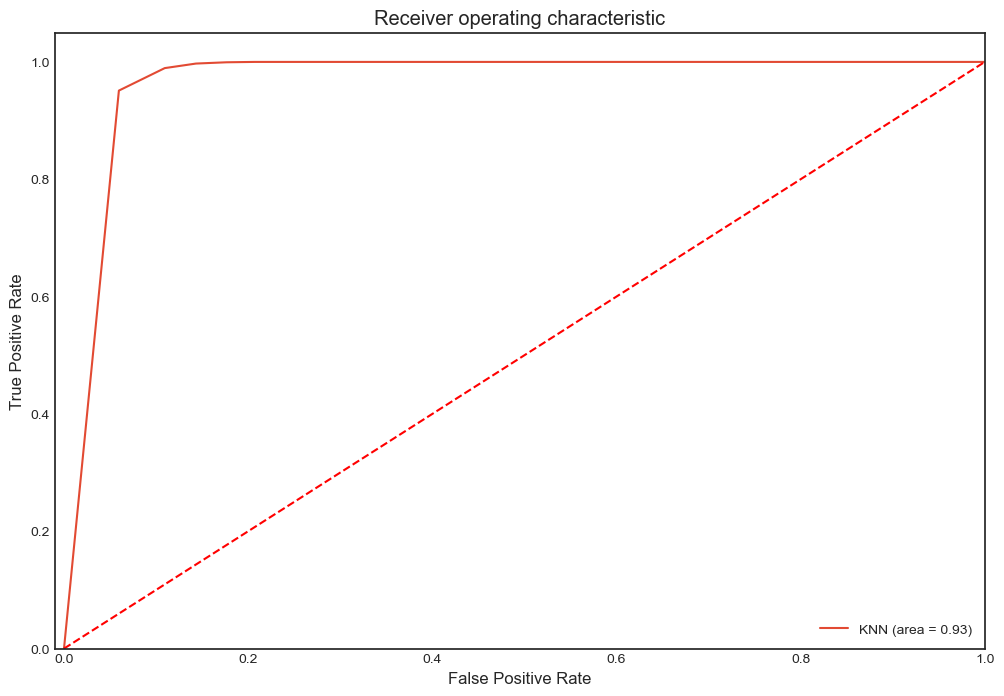

In [70]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Compute the ROC AUC score
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Insights
The AUC is 0.93, which indicates an excellent predictive ability of the KNN Model. The closer the AUC is to 1, the better the model is at distinguishing **between both the positive (yes) and negative (no) classes**.

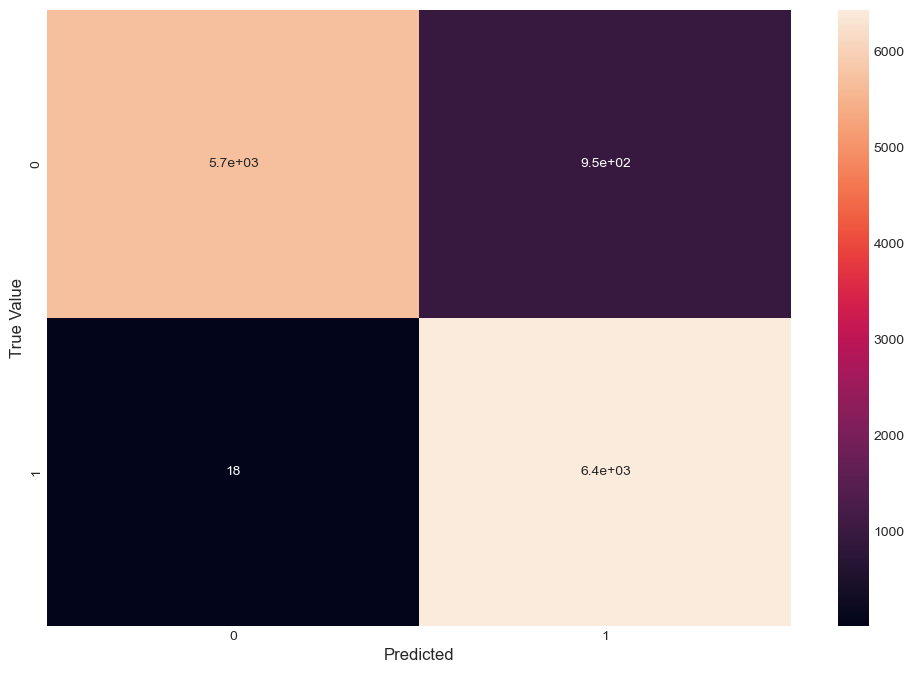

In [71]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn.predict(X_test))
cm

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

# Insights

**Confusion Matrix**:
- True Positives (TN): 5676
- False Positives (FP): 950
- False Negatives (FN): 18
- True Negatives (TP): 6427

- We have 93% accuracy and 100% precision

# PIPELINE DEVELOPMENT
This pipeline ensures that the preprocessing step (scaling) and the model training step are executed in the correct order. It also allows for easy replication of the ML steps on any new data, which is particularly useful for making predictions on unseen data

In [75]:
#Import pipeline 
from sklearn.pipeline import Pipeline

In [76]:
#Create pipeline
ml_pipe = Pipeline([('scaler', StandardScaler()),
         ('model', KNeighborsClassifier(n_neighbors=5)),
                   ]
                  )
ml_pipe.fit(X_train, y_train)#Fit pipeline to the training data

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [77]:
#Evalute model's performance
score = ml_pipe.score(X_test, y_test)
score_formatted = "{:.2f}".format(score)
print(score_formatted)

0.93


# Insight
The same score of 0.93 was obtained

# **DISCUSSION AND CONCLUSION**
Analysis of the metric indicates that predictions for potential subscribers is 87% and 100% for non-subscribers. Precision helps in understanding the proportion of correctly identified potential subscribers among those predicted to subscribe and those who will not. The recall class indicates that the model correctly identifies all actual subscribers. The F1-scores for both classes are high signifying a good balance between precision and recall. This implies that the model effectively identifies both subscribers and non-subscribers without preferring one at the expense of the other.
Overall, based on these metrics, the bank can be confident that the model provides a good solution for predicting subscription outcomes. Thus, it effectively identifies potential subscribers and non-subscribers while maintaining a high level of accuracy for both positive (yes) and negative (no) cases.


# References:
Delen, D., Sharda, R. and Kumar, P., 2007. Movie forecast Guru: A Web-based DSS for Hollywood managers. Decision Support Systems, 43(4), pp.1151-1170.


He, H. and Garcia, E.A., 2009. Learning from imbalanced data. IEEE Transactions on knowledge and data engineering, 21(9), pp.1263-1284.


Moro, S., Cortez, P. and Rita, P., 2014. A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, pp.22-31.


UCI. Bank Marketing. Machine Learning Repository. 2012. https://archive.ics.uci.edu/dataset/222/bank+marketing


Yu, C.H.A., 2022. Data mining and exploration: From traditional statistics to modern data science. CRC Press.
